# The following analyis is done on the Flight Dataset:

The dataset is the record of the flights for the year 2013 and has the following fields:
1. Flight details including carrier name, flight number, origin and destination, tail number
2. The flight scgedule including the scheduled arrival and departure time, actual arrival and departure time, arrival and departure and delay.
3. The distance travelled and the time it took to travel that distance.

In [140]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [141]:
# load dataset
dataset=pd.read_csv(r'C:\Users\nandi\Documents\PythonData1200\flights.csv')
dataset.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


Identifying the rows with atleast one NA value



In [142]:
#Summary of N/A Values
dataset.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [143]:
text = open(r"C:\Users\nandi\Documents\PythonData1200\flights.csv", "r")
text = ''.join([i for i in text]).replace("NaN", "nan")
x = open("dataset_final.csv","w")
x.writelines(text)
x.close()

Removing the rows with 'Na' Values

In [144]:
#Drop rows where all cells in that row is NA
dataset=pd.read_csv(r'C:\Users\nandi\Documents\PythonData1200\dataset_final.csv')
dataset = dataset.dropna(how='any',axis=0).reset_index(drop = True)
dataset

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30T22:00:00Z
327342,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30T22:00:00Z
327343,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30T22:00:00Z
327344,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30T22:00:00Z


In [145]:
#Summary of N/A Values
dataset.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [146]:
import sweetviz as sv

In [14]:
events_report = sv.analyze(dataset)

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)


Creating Associations graph... DONE!


In [15]:
events_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Analysing the data carrrier wise

# Visualisation 1: Carrier vs Average Speed

Total hours per flight is calculated and then speed is calculated by dividing distance with the time

In [147]:
total_hour=dataset[['distance','carrier','hour','minute']]
total_hour['total_time_hours']=((dataset.hour*60)+dataset.minute)/60
total_speed=total_hour[['carrier','distance','total_time_hours']]
total_speed['Speed']=total_speed.distance/total_speed.total_time_hours
total_speed

,carrier,distance,total_time_hours,Speed
0,UA,1400,5.250000,266.666667
1,UA,1416,5.483333,258.237082
2,AA,1089,5.666667,192.176471
3,B6,1576,5.750000,274.086957
4,DL,762,6.000000,127.000000
...,...,...,...,...
327341,B6,209,22.750000,9.186813
327342,B6,301,22.833333,13.182482
327343,B6,264,22.766667,11.595900
327344,B6,187,22.916667,8.160000


Calculating average speed per carrier

In [148]:
grouped_carr_speed1=total_speed.groupby(["carrier"])['Speed'].count().reset_index()
grouped_carr_speed1=grouped_carr_speed1.drop("carrier",axis=1)
grouped_carr_speed2=total_speed.groupby(["carrier"])['Speed'].sum().reset_index()
print(grouped_carr_speed1)
print(grouped_carr_speed2)

    Speed
0   17294
1   31947
2     709
3   54049
4   47658
5   51108
6     681
7    3175
8     342
9   25037
10     29
11  57782
12  19831
13   5116
14  12044
15    544
   carrier         Speed
0       9E  6.916136e+05
1       AA  3.700783e+06
2       AS  1.604450e+05
3       B6  4.737497e+06
4       DL  4.871443e+06
5       EV  2.415509e+06
6       F9  8.445221e+04
7       FL  1.781351e+05
8       HA  1.749179e+05
9       MQ  1.167635e+06
10      OO  8.888386e+02
11      UA  7.755054e+06
12      US  1.043378e+06
13      VX  1.122647e+06
14      WN  1.075622e+06
15      YV  1.338724e+04


In [149]:
tot_carr_speed=pd.concat([grouped_carr_speed1,grouped_carr_speed2],axis=1)
tot_carr_speed['avg_speed']=round(grouped_carr_speed2.Speed/grouped_carr_speed1.Speed,2)
fin_carr_speed=tot_carr_speed[['carrier','avg_speed']].sort_values("avg_speed",ascending=False)
print(fin_carr_speed)

   carrier  avg_speed
8       HA     511.46
2       AS     226.30
13      VX     219.44
11      UA     134.21
6       F9     124.01
1       AA     115.84
4       DL     102.22
14      WN      89.31
3       B6      87.65
7       FL      56.11
12      US      52.61
5       EV      47.26
9       MQ      46.64
0       9E      39.99
10      OO      30.65
15      YV      24.61


# HA has the maximum average speed of all the carrier

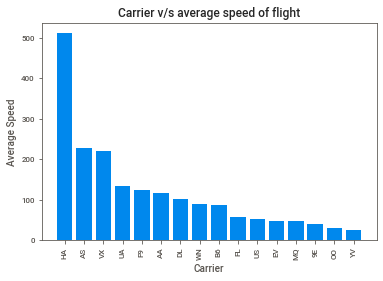

In [150]:
plt.title("Carrier v/s average speed of flight")
plt.bar(x=np.arange(1,17),height=fin_carr_speed['avg_speed'])
plt.xticks(np.arange(1,17), fin_carr_speed['carrier'], rotation=90)
plt.xlabel("Carrier")
plt.ylabel("Average Speed")
plt.show()

# Visualisation 2: Carrier vs Average Arrival Delay

All the delays that are positive are considered, as it indicated that the flights arrived late.
The delayed arrivals are averaged per carrier.

In [151]:
carr_arr_delay=dataset.loc[dataset['arr_delay'] > 0]
carr_arr_delay= carr_arr_delay[['carrier','arr_delay']]
grouped_carr_arrdel1=carr_arr_delay.groupby(["carrier"])['arr_delay'].count().reset_index()
grouped_carr_arrdel1=grouped_carr_arrdel1.drop("carrier",axis=1)
grouped_carr_arrdel2=carr_arr_delay.groupby(["carrier"])['arr_delay'].sum().reset_index()
print(grouped_carr_arrdel1)
print(grouped_carr_arrdel2)


    arr_delay
0        6637
1       10706
2         189
3       23609
4       16413
5       24484
6         392
7        1895
8          97
9       11693
10         10
11      22222
12       7349
13       1746
14       5304
15        258
   carrier  arr_delay
0       9E   327023.0
1       AA   409671.0
2       AS     6495.0
3       B6   944574.0
4       DL   619485.0
5       EV  1181808.0
6       F9    18651.0
7       FL    77874.0
8       HA     3398.0
9       MQ   442604.0
10      OO      606.0
11      UA   814458.0
12      US   213206.0
13      VX    76557.0
14      WN   216125.0
15      YV    13179.0


In [152]:
tot_carr_ad=pd.concat([grouped_carr_arrdel1,grouped_carr_arrdel2],axis=1)
tot_carr_ad['avg_arr_delay']=round(grouped_carr_arrdel2.arr_delay/grouped_carr_arrdel1.arr_delay,2)
fin_carr_ad=tot_carr_ad[['carrier','avg_arr_delay']].sort_values("avg_arr_delay",ascending=False)
print(fin_carr_ad)

   carrier  avg_arr_delay
10      OO          60.60
15      YV          51.08
0       9E          49.27
5       EV          48.27
6       F9          47.58
13      VX          43.85
7       FL          41.09
14      WN          40.75
3       B6          40.01
1       AA          38.27
9       MQ          37.85
4       DL          37.74
11      UA          36.65
8       HA          35.03
2       AS          34.37
12      US          29.01


# The OO carrier has the maximum average arrival delays and US the least

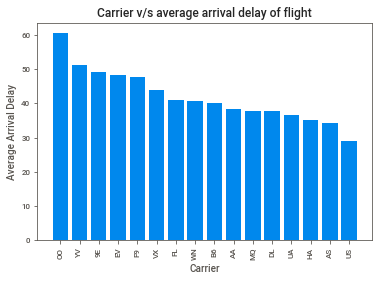

In [153]:
plt.title("Carrier v/s average arrival delay of flight")
plt.bar(x=np.arange(1,17),height=fin_carr_ad['avg_arr_delay'])
plt.xticks(np.arange(1,17), fin_carr_ad['carrier'], rotation=90)
plt.xlabel("Carrier")
plt.ylabel("Average Arrival Delay")
plt.show()

# Visualisation 3: Carrier vs Average Departure Delay

All the delays that are positive are considered, as it indicated that the flights took off late.
The delayed departures are averaged per carrier.

In [154]:
carr_dep_delay=dataset.loc[dataset['dep_delay'] > 0]
carr_dep_delay= carr_dep_delay[['carrier','dep_delay']]
grouped_carr_depdel1=carr_dep_delay.groupby(["carrier"])['dep_delay'].count().reset_index()
grouped_carr_depdel1=grouped_carr_depdel1.drop("carrier",axis=1)
grouped_carr_depdel2=carr_dep_delay.groupby(["carrier"])['dep_delay'].sum().reset_index()
print(grouped_carr_depdel1)
print(grouped_carr_depdel2)

    dep_delay
0        6980
1       10105
2         225
3       21372
4       15186
5       22976
6         340
7        1647
8          69
9        7966
10          9
11      27125
12       4762
13       2216
14       6535
15        232
   carrier  dep_delay
0       9E   338348.0
1       AA   375528.0
2       AS     7082.0
3       B6   848677.0
4       DL   566960.0
5       EV  1153276.0
6       F9    15362.0
7       FL    66909.0
8       HA     3094.0
9       MQ   356425.0
10      OO      522.0
11      UA   808059.0
12      US   156758.0
13      VX    75857.0
14      WN   227268.0
15      YV    12266.0


In [155]:
tot_carr_dd=pd.concat([grouped_carr_depdel1,grouped_carr_depdel2],axis=1)
tot_carr_dd['avg_dep_delay']=round(grouped_carr_depdel2.dep_delay/grouped_carr_depdel1.dep_delay,2)
fin_carr_dd=tot_carr_dd[['carrier','avg_dep_delay']].sort_values("avg_dep_delay",ascending=False)
print(fin_carr_dd)

   carrier  avg_dep_delay
10      OO          58.00
15      YV          52.87
5       EV          50.19
0       9E          48.47
6       F9          45.18
8       HA          44.84
9       MQ          44.74
7       FL          40.62
3       B6          39.71
4       DL          37.33
1       AA          37.16
14      WN          34.78
13      VX          34.23
12      US          32.92
2       AS          31.48
11      UA          29.79


# The OO carrier has the maximum average arrival delays and UA the least

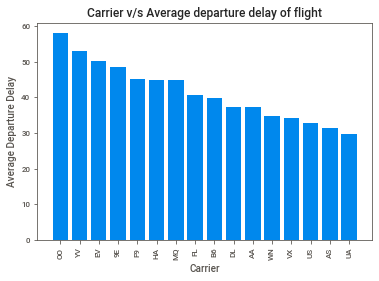

In [156]:
plt.title("Carrier v/s Average departure delay of flight")
plt.bar(x=np.arange(1,17),height=fin_carr_dd['avg_dep_delay'])
plt.xticks(np.arange(1,17), fin_carr_dd['carrier'], rotation=90)
plt.xlabel("Carrier")
plt.ylabel("Average Departure Delay")
plt.show()

# Visualisation 4: Carrier vs Average Distance

This visualisation displays the average distance covered by each carrier in the year 2013

In [157]:
carr_dist= dataset[['carrier','distance']]
grouped_carr_dist1=carr_dist.groupby(["carrier"])['distance'].count().reset_index()
grouped_carr_dist1=grouped_carr_dist1.drop("carrier",axis=1)
grouped_carr_dist2=carr_dist.groupby(["carrier"])['distance'].sum().reset_index()
print(grouped_carr_dist1)
print(grouped_carr_dist2)

    distance
0      17294
1      31947
2        709
3      54049
4      47658
5      51108
6        681
7       3175
8        342
9      25037
10        29
11     57782
12     19831
13      5116
14     12044
15       544
   carrier  distance
0       9E   9163911
1       AA  42913762
2       AS   1703018
3       B6  57815654
4       DL  58999610
5       EV  28766906
6       F9   1103220
7       FL   2110700
8       HA   1704186
9       MQ  14280468
10      OO     14769
11      UA  88482811
12      US  11121739
13      VX  12787097
14      WN  12007523
15      YV    204782


In [158]:
tot_carr_dist=pd.concat([grouped_carr_dist1,grouped_carr_dist2],axis=1)
tot_carr_dist['avg_dist']=round(grouped_carr_dist2.distance/grouped_carr_dist1.distance,2)
fin_carr_dist=tot_carr_dist[['carrier','avg_dist']].sort_values("avg_dist",ascending=False)
print(fin_carr_dist)

   carrier  avg_dist
8       HA   4983.00
13      VX   2499.43
2       AS   2402.00
6       F9   1620.00
11      UA   1531.32
1       AA   1343.28
4       DL   1237.98
3       B6   1069.69
14      WN    996.97
7       FL    664.79
9       MQ    570.37
5       EV    562.87
12      US    560.83
0       9E    529.89
10      OO    509.28
15      YV    376.44


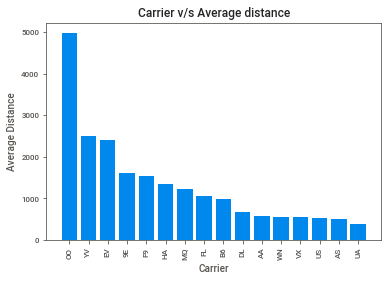

In [159]:
plt.title("Carrier v/s Average distance")
plt.bar(x=np.arange(1,17),height=fin_carr_dist['avg_dist'])
plt.xticks(np.arange(1,17), fin_carr_dd['carrier'], rotation=90)
plt.xlabel("Carrier")
plt.ylabel("Average Distance")
plt.show()

# Visualisation 5: Carrier v/s early arrival

All the delays that are negative are considered, as it indicated that the flights arrived early.
The early arrivals are averaged per carrier.

In [160]:
carr_early_arr=dataset.loc[dataset['arr_delay'] < 0]
carr_early_arr= carr_early_arr[['carrier','arr_delay']]
grouped_carr_earlarr1=carr_early_arr.groupby(["carrier"])['arr_delay'].count().reset_index()
grouped_carr_earlarr1=grouped_carr_earlarr1.drop("carrier",axis=1)
grouped_carr_earlarr2=carr_early_arr.groupby(["carrier"])['arr_delay'].sum().reset_index()
print(grouped_carr_earlarr1)
print(grouped_carr_earlarr2)

    arr_delay
0       10430
1       20769
2         512
3       29514
4       30463
5       25823
6         271
7        1211
8         241
9       12856
10         19
11      34642
12      12113
13       3276
14       6513
15        280
   carrier  arr_delay
0       9E  -199399.0
1       AA  -398033.0
2       AS   -13536.0
3       B6  -433380.0
4       DL  -541119.0
5       EV  -374484.0
6       F9    -3723.0
7       FL   -14006.0
8       HA    -5763.0
9       MQ  -172837.0
10      OO     -260.0
11      UA  -608869.0
12      US  -170974.0
13      VX   -67530.0
14      WN   -99911.0
15      YV    -4716.0


In [161]:
tot_carr_earlyarr=pd.concat([grouped_carr_earlarr1,grouped_carr_earlarr2],axis=1)
tot_carr_earlyarr['avg_early_arr']=round(grouped_carr_earlarr2.arr_delay/grouped_carr_earlarr1.arr_delay,2)
fin_carr_earl_arr=tot_carr_earlyarr[['carrier','avg_early_arr']].sort_values("avg_early_arr",ascending=False)
print(fin_carr_earl_arr)

   carrier  avg_early_arr
7       FL         -11.57
9       MQ         -13.44
10      OO         -13.68
6       F9         -13.74
12      US         -14.11
5       EV         -14.50
3       B6         -14.68
14      WN         -15.34
15      YV         -16.84
11      UA         -17.58
4       DL         -17.76
0       9E         -19.12
1       AA         -19.16
13      VX         -20.61
8       HA         -23.91
2       AS         -26.44


# AS was the carrier that arrived before time most of the time

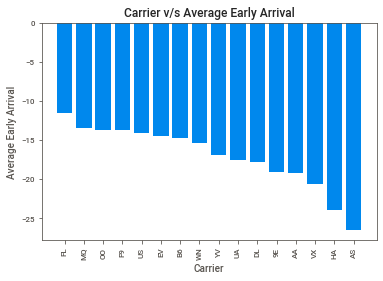

In [162]:
plt.title("Carrier v/s Average Early Arrival")
plt.bar(x=np.arange(1,17),height=fin_carr_earl_arr['avg_early_arr'])
plt.xticks(np.arange(1,17), fin_carr_earl_arr['carrier'], rotation=90)
plt.xlabel("Carrier")
plt.ylabel("Average Early Arrival")
plt.show()

# Task 3

A new dataset pop_data is created that contains only the information for DL and UA.
The data is arranged in descending order of the arrivl delay

In [163]:
pop_data=dataset[(dataset.carrier=='DL') | (dataset.carrier=='UA')]
pop_data=pop_data[['carrier','arr_delay']].sort_values("arr_delay",ascending=False)
pop_data

,carrier,arr_delay
169363,DL,931.0
147683,DL,915.0
263091,DL,895.0
93707,DL,856.0
240226,DL,850.0
...,...,...
199595,UA,-70.0
194505,UA,-71.0
193359,DL,-71.0
189882,UA,-73.0


The pop_data is filtered for the flights that arrived late for more than 3 hours of their scheduled time.
We have cosidered 3 hour as the threshold for the late arrivals

In [164]:
#Filtering the carriers for delays more than 3 hours 
pop_data=pop_data.loc[pop_data['arr_delay'] > 3]

In [165]:
pop_data1=pop_data.groupby("carrier")["arr_delay"].count()
pop_data

,carrier,arr_delay
169363,DL,931.0
147683,DL,915.0
263091,DL,895.0
93707,DL,856.0
240226,DL,850.0
...,...,...
76719,UA,4.0
208665,UA,4.0
149703,DL,4.0
12021,UA,4.0


In [166]:
pop_data1

carrier
DL    14379
UA    19722
Name: arr_delay, dtype: int64

# Task 4

The dataset dl containst the details of the delayed flights with the carrier DL and are labeled with Sample ID 1 

In [167]:
dl=pop_data[(pop_data.carrier=='DL')]
dl=dl.head(1000)
dl['Sample_id']=1
dl

,carrier,arr_delay,Sample_id
169363,DL,931.0,1
147683,DL,915.0,1
263091,DL,895.0,1
93707,DL,856.0,1
240226,DL,850.0,1
...,...,...,...
90223,DL,129.0,1
241458,DL,129.0,1
240734,DL,129.0,1
197927,DL,129.0,1


The dataset ua containst the details of the delayed flights with the carrier UA and are labeled with Sample ID 2

In [168]:
ua=pop_data[(pop_data.carrier=='UA')]
ua=ua.head(1000)
ua['Sample_id']=2
ua

,carrier,arr_delay,Sample_id
266959,UA,455.0,2
177170,UA,435.0,2
238611,UA,424.0,2
88192,UA,422.0,2
251917,UA,414.0,2
...,...,...,...
117291,UA,141.0,2
243610,UA,141.0,2
169319,UA,141.0,2
172405,UA,141.0,2


# Task 5

Both dl and ua are concatenate and arranged in descending order of their delayed arrival

In [169]:
frames=[ua,dl]
sample = pd.concat(frames)
sample= sample[['carrier','arr_delay','Sample_id']].sort_values("arr_delay",ascending=False)
sample

,carrier,arr_delay,Sample_id
169363,DL,931.0,1
147683,DL,915.0,1
263091,DL,895.0,1
93707,DL,856.0,1
240226,DL,850.0,1
...,...,...,...
139246,DL,129.0,1
249134,DL,129.0,1
89003,DL,129.0,1
171364,DL,129.0,1


In [170]:
dl.describe()


,arr_delay,Sample_id
count,1000.000000,1000.0
mean,214.628000,1.0
std,109.399542,0.0
min,129.000000,1.0
25%,148.000000,1.0
50%,179.000000,1.0
75%,240.250000,1.0
max,931.000000,1.0


In [171]:
ua.describe()

,arr_delay,Sample_id
count,1000.000000,1000.0
mean,207.553000,2.0
std,61.339283,0.0
min,141.000000,2.0
25%,160.000000,2.0
50%,187.000000,2.0
75%,240.000000,2.0
max,455.000000,2.0


# Task 6

Standard error for both dl and ua are calculated by dividing standard deviation of each by square root of their number of observation which 1000

In [172]:
se_dl=dl['arr_delay'].std()/math.sqrt(1000)
print("Standard Error for dl: {0}".format(se_dl))

Standard Error for dl: 3.4595172894315587


In [173]:
se_ua=ua['arr_delay'].std()/math.sqrt(1000)
print("Standard Error for ua: {0}".format(se_ua))

Standard Error for ua: 1.939718458616792



# Task 7

The margin error, upper and lower limit is calculated for both dl and ua

In [174]:
#For Dl
dl_margin_error=1.96*se_dl
lower_dl=dl['arr_delay'].mean()-dl_margin_error
upper_dl=dl['arr_delay'].mean()+dl_margin_error

print("The metrics for DL are \n")
print("1. Lower Value:",dl['arr_delay'].mean()-dl_margin_error)
print("2. Mean Value:",1.96*se_dl)
print("3. Uppper Value:",dl['arr_delay'].mean()+dl_margin_error)

The metrics for DL are 

1. Lower Value: 207.84734611271412
2. Mean Value: 6.780653887285855
3. Uppper Value: 221.40865388728585


In [175]:
#For UA
ua_margin_error=1.96*se_ua
lower_ua=ua['arr_delay'].mean()-ua_margin_error
upper_ua=ua['arr_delay'].mean()+ua_margin_error

print("The metrics for UA are \n")
print("1. Lower Value:",ua['arr_delay'].mean()-ua_margin_error)
print("2. Mean Value:",1.96*se_ua)
print("3. Uppper Value:",ua['arr_delay'].mean()+ua_margin_error)

The metrics for UA are 

1. Lower Value: 203.75115182111108
2. Mean Value: 3.8018481788889122
3. Uppper Value: 211.35484817888891


# Task 8

The one sample t test compares the mean your sample data to a known value.

Assumptions of the test (your data should meet these requirements for the test to be valid):
• Data is independent.
• Data is collected randomly.
• The data is approximately normally distributed

To evaluate the statistical significance of the t-test, you need to compute the p-value. The p-value ranges from 0 to 1, and is interpreted as follow:
• A p-value lower than 0.05 means you are strongly confident to reject the null hypothesis
• A p-value higher than 0.05 indicates that you don't have enough evidences to reject the null hypothesis.

In [176]:
print("Null Hypothesis: Flight with DL carrier are more delayed than UA")
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(dl['arr_delay'], ua['arr_delay'])
print("p-value",pval)
if pval<0.05:
    print("We reject the null hypothesis, i.e., UA is more delayed than DL")
elif pval>0.05:
    print("We accept the null hypothesis, i.e., DL is more delayed than UA")

Null Hypothesis: Flight with DL carrier are more delayed than UA
p-value 0.07460434224781749
We accept the null hypothesis, i.e., DL is more delayed than UA
